Import Libs

In [34]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate,KFold,cross_val_score,TimeSeriesSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import roc_curve,roc_auc_score

In [35]:
data=pd.read_csv(r'C:\Users\Nurlan\Desktop\python 0dan record\ml\weatherAUS.csv')
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [37]:
data.isnull().mean()

Date             0.000000
Location         0.000000
MinTemp          0.010209
MaxTemp          0.008669
Rainfall         0.022419
Evaporation      0.431665
Sunshine         0.480098
WindGustDir      0.070989
WindGustSpeed    0.070555
WindDir9am       0.072639
WindDir3pm       0.029066
WindSpeed9am     0.012148
WindSpeed3pm     0.021050
Humidity9am      0.018246
Humidity3pm      0.030984
Pressure9am      0.103568
Pressure3pm      0.103314
Cloud9am         0.384216
Cloud3pm         0.408071
Temp9am          0.012148
Temp3pm          0.024811
RainToday        0.022419
RainTomorrow     0.022460
dtype: float64

In [38]:
data.shape

(145460, 23)

In [39]:
data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [40]:
data['Date']=pd.to_datetime(data['Date'])

Fill NA Values

In [41]:
data['Date']=pd.to_datetime(data['Date'])
data['Location']=data['Location'].fillna(data['Location'].mode()[0])
data['WindGustDir']=data['WindGustDir'].fillna(data['WindGustDir'].mode()[0])
data['WindDir9am']=data['WindDir9am'].fillna(data['WindDir9am'].mode()[0])
data['WindDir3pm']=data['WindDir3pm'].fillna(data['WindDir3pm'].mode()[0])
data['RainToday']=data['RainToday'].fillna(data['RainToday'].mode()[0])

In [42]:
data['MinTemp']=data['MinTemp'].fillna(data['MinTemp'].mean())
data['MaxTemp']=data['MaxTemp'].fillna(data['MaxTemp'].mean())
data['Rainfall']=data['Rainfall'].fillna(data['Rainfall'].mean())
data['Evaporation']=data['Evaporation'].fillna(data['Evaporation'].mean())
data['Sunshine']=data['Sunshine'].fillna(data['Sunshine'].mean())
data['WindGustSpeed']=data['WindGustSpeed'].fillna(data['WindGustSpeed'].mean())
data['WindSpeed9am']=data['WindSpeed9am'].fillna(data['WindSpeed9am'].mean())
data['WindSpeed3pm']=data['WindSpeed3pm'].fillna(data['WindSpeed3pm'].mean())
data['Humidity3pm']=data['Humidity3pm'].fillna(data['Humidity3pm'].mean())
data['Pressure9am']=data['Pressure9am'].fillna(data['Pressure9am'].mean())
data['Pressure3pm']=data['Pressure3pm'].fillna(data['Pressure3pm'].mean())
data['Cloud9am']=data['Cloud9am'].fillna(data['Cloud9am'].mean())
data['Cloud3pm']=data['Cloud3pm'].fillna(data['Cloud3pm'].mean())
data['Temp9am']=data['Temp9am'].fillna(data['Temp9am'].mean())
data['Temp3pm']=data['Temp3pm'].fillna(data['Temp3pm'].mean())

In [43]:
data=data.sort_values(by='Date')

In [44]:
data.drop_duplicates().head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
45587,2007-11-01,Canberra,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,...,68.0,29.0,1019.7,1015.0,7.0,7.0,14.4,23.6,No,Yes
45588,2007-11-02,Canberra,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,...,80.0,36.0,1012.4,1008.4,5.0,3.0,17.5,25.7,Yes,Yes
45589,2007-11-03,Canberra,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,...,82.0,69.0,1009.5,1007.2,8.0,7.0,15.4,20.2,Yes,Yes
45590,2007-11-04,Canberra,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,...,62.0,56.0,1005.5,1007.0,2.0,7.0,13.5,14.1,Yes,Yes
45591,2007-11-05,Canberra,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,...,68.0,49.0,1018.3,1018.5,7.0,7.0,11.1,15.4,Yes,No


In [45]:
data.dropna(inplace=True)

In [46]:
data.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [47]:
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
45587,2007-11-01,Canberra,8.0,24.3,0.0,3.400000,6.300000,NW,30.00000,SW,...,68.0,29.0,1019.70000,1015.000000,7.000000,7.00000,14.4,23.6,No,Yes
45588,2007-11-02,Canberra,14.0,26.9,3.6,4.400000,9.700000,ENE,39.00000,E,...,80.0,36.0,1012.40000,1008.400000,5.000000,3.00000,17.5,25.7,Yes,Yes
45589,2007-11-03,Canberra,13.7,23.4,3.6,5.800000,3.300000,NW,85.00000,N,...,82.0,69.0,1009.50000,1007.200000,8.000000,7.00000,15.4,20.2,Yes,Yes
45590,2007-11-04,Canberra,13.3,15.5,39.8,7.200000,9.100000,NW,54.00000,WNW,...,62.0,56.0,1005.50000,1007.000000,2.000000,7.00000,13.5,14.1,Yes,Yes
45591,2007-11-05,Canberra,7.6,16.1,2.8,5.600000,10.600000,SSE,50.00000,SSE,...,68.0,49.0,1018.30000,1018.500000,7.000000,7.00000,11.1,15.4,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126831,2017-06-25,SalmonGums,4.7,12.6,0.0,5.468232,7.611178,SE,15.00000,SSE,...,94.0,60.0,1017.64994,1015.255889,4.447461,4.50993,9.6,12.2,No,No
64190,2017-06-25,Sale,0.1,14.8,0.0,5.468232,7.611178,W,40.03523,WNW,...,72.0,50.0,1016.30000,1013.200000,4.447461,4.50993,5.9,14.0,No,No
67199,2017-06-25,MelbourneAirport,5.5,13.9,0.0,2.800000,3.800000,NNW,44.00000,N,...,72.0,58.0,1017.80000,1015.500000,7.000000,7.00000,8.1,12.2,No,No
70392,2017-06-25,Melbourne,8.6,14.3,0.0,2.800000,3.800000,NW,35.00000,N,...,67.0,56.0,1017.40000,1015.000000,7.000000,7.00000,9.3,13.4,No,Yes


LogisticRegression

Split 1 - Accuracy: 0.84
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     17495
           1       0.76      0.53      0.63      5908

    accuracy                           0.84     23403
   macro avg       0.81      0.74      0.76     23403
weighted avg       0.83      0.84      0.83     23403

Split 2 - Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     18262
           1       0.73      0.48      0.58      5141

    accuracy                           0.85     23403
   macro avg       0.80      0.72      0.75     23403
weighted avg       0.84      0.85      0.84     23403

Split 3 - Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     18326
           1       0.71      0.55      0.62      5077

    accuracy                           0.85     23403
   macro avg       0.80      0.74      0.77     23403

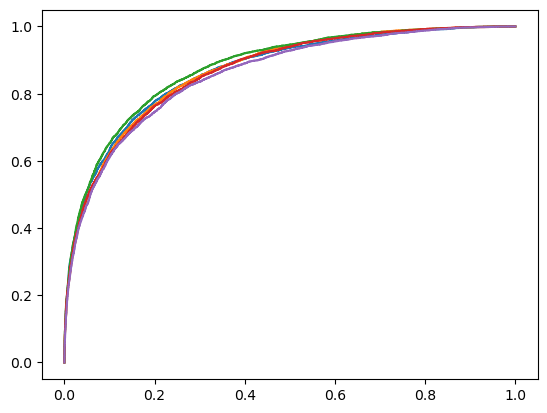

In [48]:
numerical_cols = ['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']
categorical_cols = ['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday']
target_column = 'RainTomorrow'

X = data.drop(columns=['RainTomorrow', 'Date'],axis=1)
y = data['RainTomorrow']

def num(x_train,x_test,num_imputer=SimpleImputer(strategy="mean"),scaler=StandardScaler()):
    global numerical_cols
    X_train_num = scaler.fit_transform(num_imputer.fit_transform(X_train[numerical_cols]))
    X_test_num = scaler.transform(num_imputer.transform(X_test[numerical_cols]))
    return X_train_num,X_test_num


def cat(x_train,x_test,imputer=SimpleImputer(strategy='most_frequent',fill_value='missing'),encoder=OneHotEncoder(handle_unknown='ignore', sparse=False)):
    global categorical_cols
    X_train_cat = encoder.fit_transform(imputer.fit_transform(X_train[categorical_cols]))
    X_test_cat = encoder.transform(imputer.transform(X_test[categorical_cols]))
    return X_train_cat,X_test_cat

tscv=TimeSeriesSplit(n_splits=5)
split_num = 1
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    X_train_num,X_test_num=num(X_train,X_test)
    X_train_cat,X_test_cat=cat(X_train,X_test)

    X_train_processed = np.hstack((X_train_num, X_train_cat))
    X_test_processed = np.hstack((X_test_num, X_test_cat))

    encode=LabelEncoder()
    y_train=encode.fit_transform(y_train)
    y_test=encode.fit_transform(y_test)

    model = LogisticRegression()
    model.fit(X_train_processed, y_train)
    
    y_pred = model.predict(X_test_processed)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Split {split_num} - Accuracy: {accuracy:.2f}")
    y_prob=model.predict_proba(X_test_processed)[:,1]

    print(classification_report(y_test,y_pred))

    
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)

    plt.plot(fpr, tpr, label='AUC: {:.3f}'.format(auc))
    
    split_num += 1


DecisionTreeClassifier

Split 1 - Accuracy: 0.77
              precision    recall  f1-score   support

           0       0.78      0.97      0.86     17495
           1       0.66      0.20      0.31      5908

    accuracy                           0.77     23403
   macro avg       0.72      0.58      0.59     23403
weighted avg       0.75      0.77      0.72     23403

Split 2 - Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.82      0.98      0.89     18262
           1       0.75      0.23      0.35      5141

    accuracy                           0.81     23403
   macro avg       0.78      0.60      0.62     23403
weighted avg       0.80      0.81      0.77     23403

Split 3 - Accuracy: 0.80
              precision    recall  f1-score   support

           0       0.82      0.96      0.88     18326
           1       0.61      0.21      0.32      5077

    accuracy                           0.80     23403
   macro avg       0.71      0.59      0.60     23403

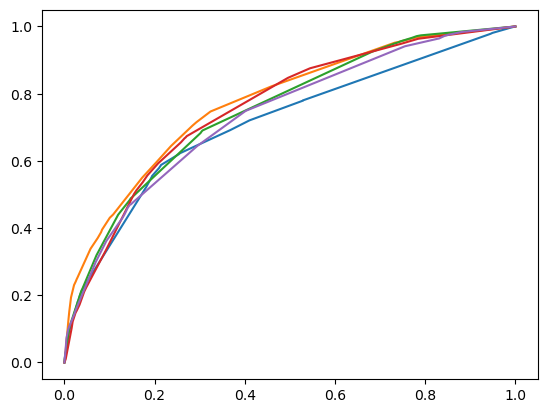

In [49]:
numerical_cols = ['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']
categorical_cols = ['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday']
target_column = 'RainTomorrow'

X = data.drop(columns=['RainTomorrow', 'Date'],axis=1)
y = data['RainTomorrow']

def num(x_train,x_test,num_imputer=SimpleImputer(strategy="mean"),scaler=StandardScaler()):
    global numerical_cols
    X_train_num = scaler.fit_transform(num_imputer.fit_transform(X_train[numerical_cols]))
    X_test_num = scaler.transform(num_imputer.transform(X_test[numerical_cols]))
    return X_train_num,X_test_num


def cat(x_train,x_test,imputer=SimpleImputer(strategy='most_frequent',fill_value='missing'),encoder=OneHotEncoder(handle_unknown='ignore', sparse=False)):
    global categorical_cols
    X_train_cat = encoder.fit_transform(imputer.fit_transform(X_train[categorical_cols]))
    X_test_cat = encoder.transform(imputer.transform(X_test[categorical_cols]))
    return X_train_cat,X_test_cat

tscv=TimeSeriesSplit(n_splits=5)
split_num = 1
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    X_train_num,X_test_num=num(X_train,X_test)
    X_train_cat,X_test_cat=cat(X_train,X_test)

    X_train_processed = np.hstack((X_train_num, X_train_cat))
    X_test_processed = np.hstack((X_test_num, X_test_cat))

    encode=LabelEncoder()
    y_train=encode.fit_transform(y_train)
    y_test=encode.fit_transform(y_test)

    model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    random_state=42
    )
    model.fit(X_train_processed, y_train)
    
    y_pred = model.predict(X_test_processed)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Split {split_num} - Accuracy: {accuracy:.2f}")
    y_prob=model.predict_proba(X_test_processed)[:,1]

    print(classification_report(y_test,y_pred))

    
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)

    plt.plot(fpr, tpr, label='AUC: {:.3f}'.format(auc))
    
    split_num += 1


PCA Logreg

              precision    recall  f1-score   support

           0       0.91      0.77      0.84     17495
           1       0.54      0.79      0.64      5908

    accuracy                           0.78     23403
   macro avg       0.73      0.78      0.74     23403
weighted avg       0.82      0.78      0.79     23403

              precision    recall  f1-score   support

           0       0.92      0.81      0.86     18262
           1       0.52      0.74      0.61      5141

    accuracy                           0.79     23403
   macro avg       0.72      0.77      0.74     23403
weighted avg       0.83      0.79      0.81     23403

              precision    recall  f1-score   support

           0       0.93      0.80      0.86     18326
           1       0.52      0.78      0.62      5077

    accuracy                           0.79     23403
   macro avg       0.72      0.79      0.74     23403
weighted avg       0.84      0.79      0.81     23403

              preci

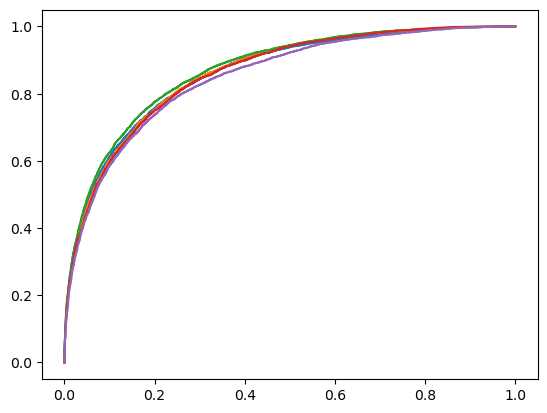

In [50]:
numerical_cols = ['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']
categorical_cols = ['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday']
target_column = 'RainTomorrow'

X = data.drop(columns=['RainTomorrow', 'Date'],axis=1)
y = data['RainTomorrow']

def num(x_train,x_test,num_imputer=SimpleImputer(strategy="mean"),scaler=StandardScaler()):
    global numerical_cols
    X_train_num = scaler.fit_transform(num_imputer.fit_transform(X_train[numerical_cols]))
    X_test_num = scaler.transform(num_imputer.transform(X_test[numerical_cols]))
    return X_train_num,X_test_num


def cat(x_train,x_test,imputer=SimpleImputer(strategy='most_frequent',fill_value='missing'),encoder=OneHotEncoder(handle_unknown='ignore', sparse=False)):
    global categorical_cols
    X_train_cat = encoder.fit_transform(imputer.fit_transform(X_train[categorical_cols]))
    X_test_cat = encoder.transform(imputer.transform(X_test[categorical_cols]))
    return X_train_cat,X_test_cat

tscv=TimeSeriesSplit(n_splits=5)
split_num = 1
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    X_train_num,X_test_num=num(X_train,X_test)
    X_train_cat,X_test_cat=cat(X_train,X_test)

    X_train_processed = np.hstack((X_train_num, X_train_cat))
    X_test_processed = np.hstack((X_test_num, X_test_cat))

    encode=LabelEncoder()
    y_train=encode.fit_transform(y_train)
    y_test=encode.fit_transform(y_test)

    pca = PCA(n_components=0.95)
    X_train_pca = pca.fit_transform(X_train_processed)
    X_test_pca = pca.transform(X_test_processed)
    explained_variance = pca.explained_variance_ratio_

    logreg = LogisticRegression(max_iter=1000, random_state=42,class_weight='balanced')
    logreg.fit(X_train_pca, y_train)

    y_pred_logreg_pca = logreg.predict(X_test_pca)
    y_prob=logreg.predict_proba(X_test_pca)[:,1]

    print(classification_report(y_test,y_pred_logreg_pca))

    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)

    plt.plot(fpr, tpr, label='AUC: {:.3f}'.format(auc))
